In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os, sys, re

from collections import Counter
from itertools import chain

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Load Data
Files to load: all (`os.listdir` with model specified) vs specific list

Note: `reference` might also contain non test files - filter out

In [4]:
def name_adapt(s:str, extra_patterns:list=[]):
    extra_patterns += ['finetuned', '.csv']
    for p in extra_patterns:
        s = s.replace(p,'')
    # replace adjacent '-' / '_' with only one
    return re.sub('[-_]{1,}','-',s)


In [31]:
dataset = "hcrc_maptask"
data_folder = f"../data/{dataset}"
gf_reference = "gpt2-en-maptask-finetuned_file_1024.csv"
model_patterns = ['rnn', 'gpt']
data_paths = {
    ("reference" if x == gf_reference else name_adapt(x,[dataset])):x for x in os.listdir(data_folder) if any([y in x.lower() for y in model_patterns])
}

In [32]:
gpt_ctx_nopivot = [k for k,v in data_paths.items() if 'c0-8.csv' in v]
if len(gpt_ctx_nopivot) > 0:
    gpt_c08l = pd.read_csv(os.path.join(data_folder, data_paths.pop(gpt_ctx_nopivot[0])))
data_paths

{'microsoft-dialogpt-small-maptask-cf': 'microsoft-dialogpt-small-maptask-cf.csv',
 'microsoft-dialogpt-ds-test': 'microsoft-dialogpt-ds-test.csv',
 'gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-fft': 'gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_normalised_h_fft.csv',
 'gpt2-en-maptask-maptask-ds-agg1-theme0-normalised-h-pso': 'gpt2-en-maptask-finetuned-maptask-ds_agg1_theme0_normalised_h_pso.csv',
 'gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-rp': 'gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_normalised_h_rp.csv',
 'gpt2-en-maptask-maptask-ds-agg0-theme0-rp': 'gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_rp.csv',
 'reference': 'gpt2-en-maptask-finetuned_file_1024.csv',
 'microsoft-DialoGPT-small-file-1024': 'microsoft-DialoGPT-small_file_1024.csv',
 'gpt2-en-maptask-maptask-ds-agg0-theme0-fft': 'gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_fft.csv',
 'gpt2-en-maptask-maptask-ds': 'gpt2-en-maptask-finetuned-maptask-ds.csv',
 'gpt2-en-maptask-maptask-ds-a

In [33]:
df = {}
for k,v in data_paths.items():
    tmp = pd.read_csv(os.path.join(data_folder,v))
    if 'model' not in tmp.columns: # typically: reference
        tmp['model'] = k
    df[k] = tmp

res = pd.concat(df.values(), axis=0)

In [34]:
models = res.model.unique()
models

array(['microsoft-dialogpt-small-context_ 000—bs8',
       'microsoft-dialogpt-small-context_<|endoftext|>000—bs8',
       'microsoft-dialogpt-small-context_<|endoftext|>100—bs8',
       'microsoft-dialogpt-ds-test',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-fft',
       'gpt2-en-maptask-maptask-ds-agg1-theme0-normalised-h-pso',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-rp',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-rp', 'reference',
       'microsoft-DialoGPT-small-file-1024',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-fft',
       'gpt2-en-maptask-finetuned-ds',
       'gpt2-en-maptask-maptask-ds-agg1-theme0-normalised-h-fft',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-pso', '_0',
       '_1', '_2', '_3', '_4', '_5', '_6', '_7',
       'gpt2-en-maptask-maptask-ds-agg0-theme0-pso',
       'gpt2-en-maptask-maptask-ds-agg1-theme0-normalised-h-rp',
       'microsoft-DialoGPT-small-no-context'], dtype=object)

Removing files not analysed for every model:

In [20]:
#if 'reference' in res.model.unique():
#    test_files = res[res.model != 'reference'].file.unique()
#    res = res[res.file.isin(test_files)]
res_files = Counter(chain(*[res[res.model == model].file.unique() for model in res.model.unique()]))
res_files = [k for k,v in res_files.items() if v == len(models)]
res = res[res.file.isin(res_files)]

In [21]:
res.head()

,file,speaker,theme_id,transaction_type,move_number,move_type,index,theme_index,duration,text,...,normalised_h_6,length_6,tokens_h_6,sum_h_6,xu_h_6,normalised_h_7,length_7,tokens_h_7,sum_h_7,xu_h_7


In [11]:
res.isna().sum(axis=0)

file                        0.0
speaker                     0.0
theme_id                    0.0
transaction_type            0.0
move_number                 0.0
move_type                   0.0
index                       0.0
theme_index                 0.0
duration                    0.0
text                        0.0
context_0                   0.0
text_u                      0.0
context_1                   0.0
context_2                   0.0
context_3                   0.0
context_4                   0.0
context_5                   0.0
context_6                   0.0
context_7                   0.0
context_ 000                0.0
context_<|endoftext|>000    0.0
context_<|endoftext|>100    0.0
normalised_h                0.0
length                      0.0
tokens_h                    0.0
sum_h                       0.0
tokens                      0.0
xu_h                        0.0
model                       0.0
text_input_ids              0.0
text_u_full                 0.0
text_inp

In [46]:
length_by_file = res.groupby('file')['index'].max().to_dict()

## Plots

### Checking consistency

In [22]:
reference_name = 'reference'#'gpt2-fr-paco-cheese-finetuned-context_<|endoftext|>000—bs1'#'reference'

In [35]:
models = res.model.unique()
merge_cols = ['file', 'index', 'speaker', 'text']
int_cols = ['normalised_h', 'xu_h', 'length']
cols = merge_cols + int_cols
comparison_df = {}
if reference_name in models:
    ref = res[res.model == reference_name][cols]
    for model in models:
        c = pd.merge(left=ref, right=res[res.model == model][cols], left_on=merge_cols, right_on=merge_cols, suffixes=('_ref', '_mod')).dropna(axis=0, subset=['xu_h_mod'])
        print(f"Correlation for model {model}: normalised_h {c.normalised_h_ref.corr(c.normalised_h_mod)} - xu_h {c.xu_h_ref.corr(c.xu_h_mod)}")
        comparison_df[model] = c
    

Correlation for model microsoft-dialogpt-small-context_ 000—bs8: normalised_h -0.14021840719006126 - xu_h -0.03260672117791995
Correlation for model microsoft-dialogpt-small-context_<|endoftext|>000—bs8: normalised_h -0.19465310135072125 - xu_h -0.06085600059672726
Correlation for model microsoft-dialogpt-small-context_<|endoftext|>100—bs8: normalised_h -0.2533065855317342 - xu_h -0.06250464071075659
Correlation for model microsoft-dialogpt-ds-test: normalised_h -0.1987735010555964 - xu_h -0.052491686538509004
Correlation for model gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-fft: normalised_h nan - xu_h nan
Correlation for model gpt2-en-maptask-maptask-ds-agg1-theme0-normalised-h-pso: normalised_h nan - xu_h nan
Correlation for model gpt2-en-maptask-maptask-ds-agg0-theme0-normalised-h-rp: normalised_h nan - xu_h nan
Correlation for model gpt2-en-maptask-maptask-ds-agg0-theme0-rp: normalised_h nan - xu_h nan
Correlation for model reference: normalised_h 1.0 - xu_h 1.0
Correlatio

In [28]:
#comparison_name = 'microsoft-dialogpt-small-context_<|endoftext|>100—bs8'
comparison_name = 'gpt2-en-maptask-finetuned-ds'
#comparison_name = 'microsoft-dialogpt-ds-test'
#comparison_name = 'gpt2-en-maptask-file-1024'

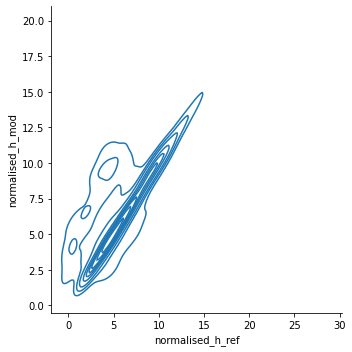

In [36]:
#sns.displot(data=comparison_df['gpt2-fr-paco-cheese-finetuned-context_<|endoftext|>000—bs1'], x="normalised_h_ref", y="normalised_h_mod", kind="kde")
sns.displot(data=comparison_df[comparison_name], x="normalised_h_ref", y="normalised_h_mod", kind="kde")

And removing lines for which tokenizer leads to different results:

In [41]:
c = comparison_df[comparison_name]
err = c[c.length_ref != c.length_mod]
c = c[c.length_ref == c.length_mod]

number of lines unaffected: 0.6897377710539586


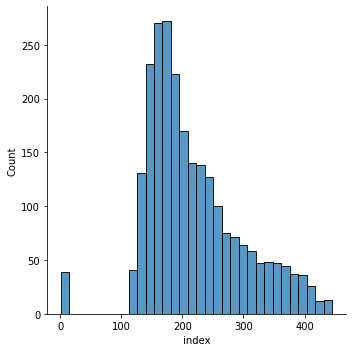

In [44]:
print(f'number of lines unaffected: {c.shape[0]/comparison_df[comparison_name].shape[0]}')
sns.displot(data=err, x='index', kind='hist')

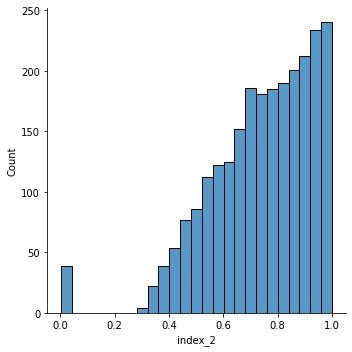

In [49]:
err['index_2'] = err.apply(lambda x: x['index'] / length_by_file[x['file']], axis=1)
sns.displot(data=err, x='index_2', kind='hist')

Percentage of files: 0.3023255813953488


<AxesSubplot:ylabel='Frequency'>

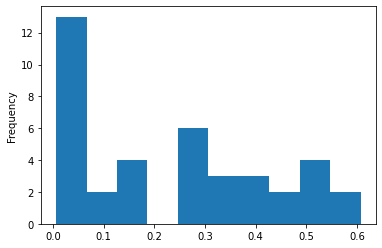

In [55]:
files_with_err = (err.groupby('file').count()['index'] / pd.Series(length_by_file))
print('Percentage of files:', files_with_err.dropna().shape[0]/files_with_err.shape[0])
files_with_err.dropna().plot.hist()

Correlation for model microsoft-DialoGPT-small-no-context: normalised_h 0.9990174654311874 - xu_h 0.9739578975275629


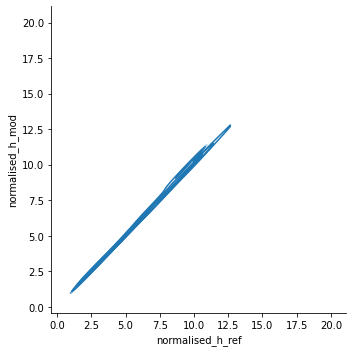

In [38]:
print(f"Correlation for model {model}: normalised_h {c.normalised_h_ref.corr(c.normalised_h_mod)} - xu_h {c.xu_h_ref.corr(c.xu_h_mod)}")
sns.displot(data=c, x="normalised_h_ref", y="normalised_h_mod", kind="kde")

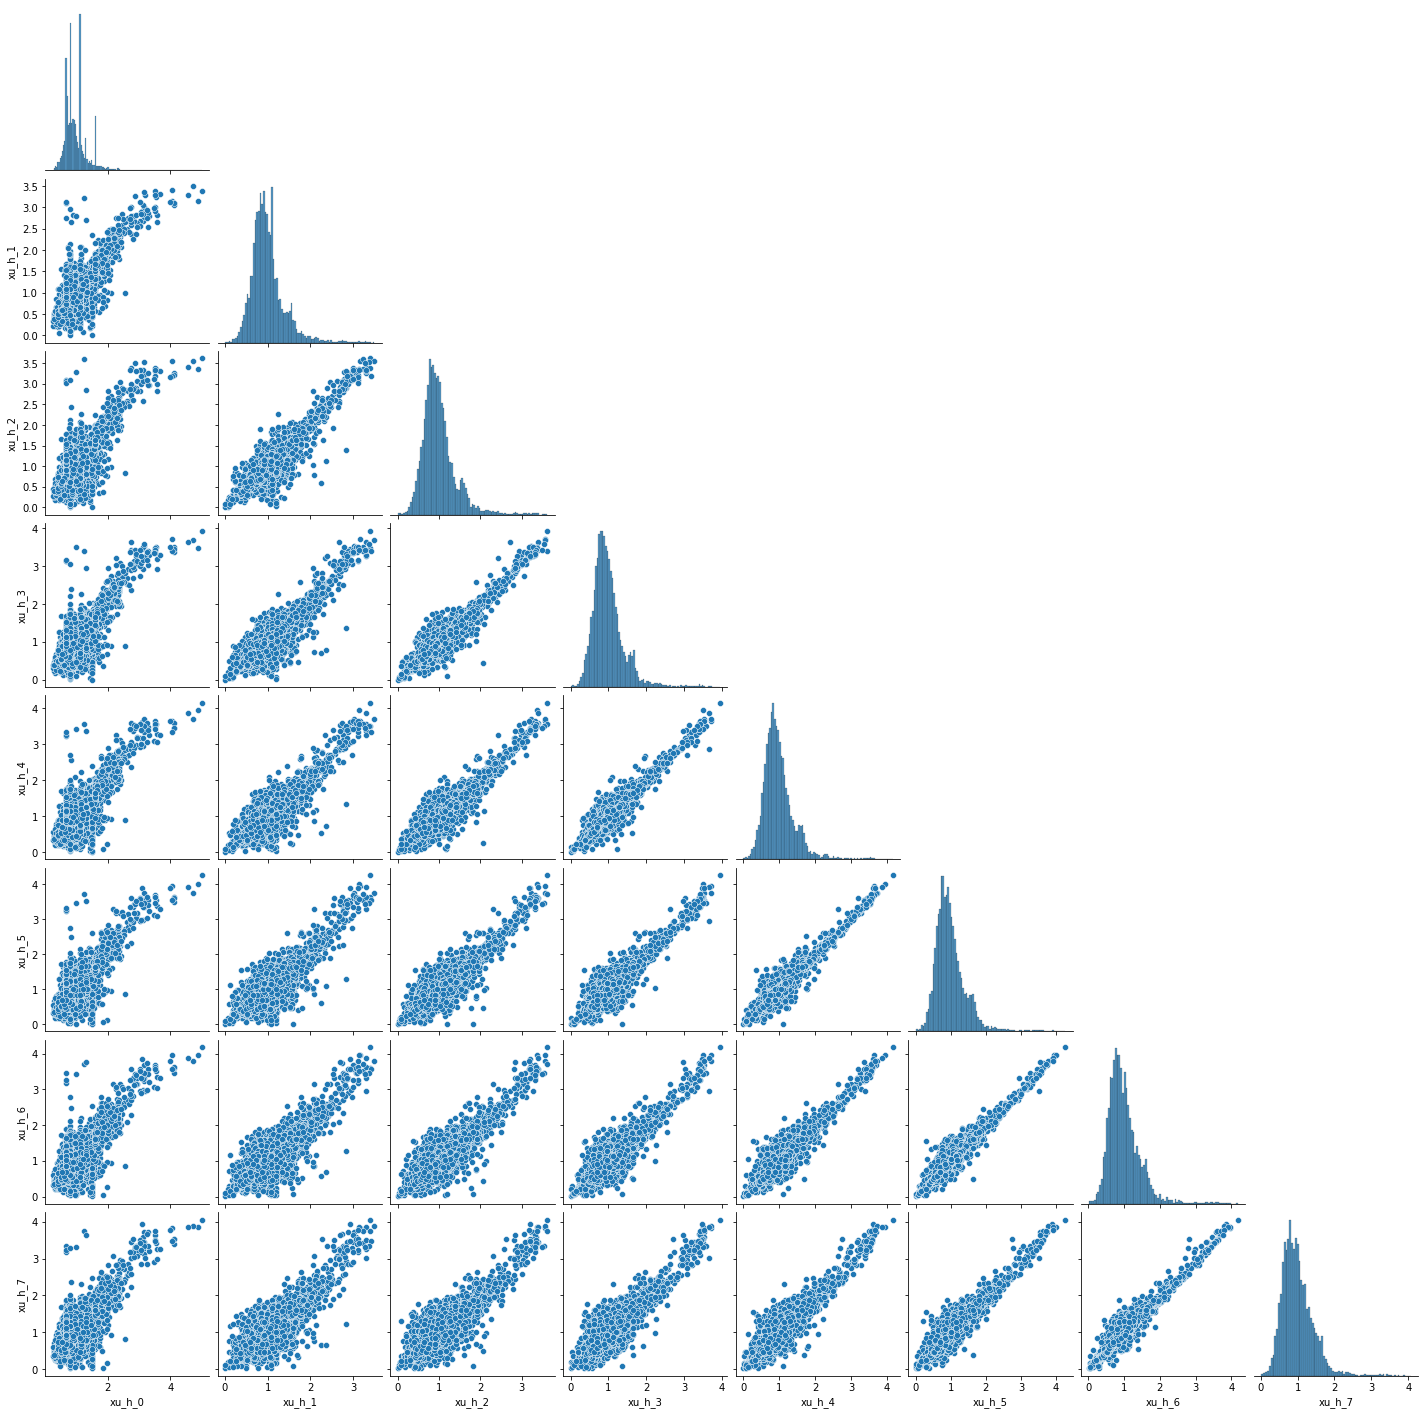

In [27]:
sns.pairplot(gpt_c08l, vars = [f'xu_h_{i}' for i in range(0,8)], corner=True)
plt.show()

### Generals

In [111]:
# keep for study
dialogs = res[res.model.isin([reference_name, comparison_name])]

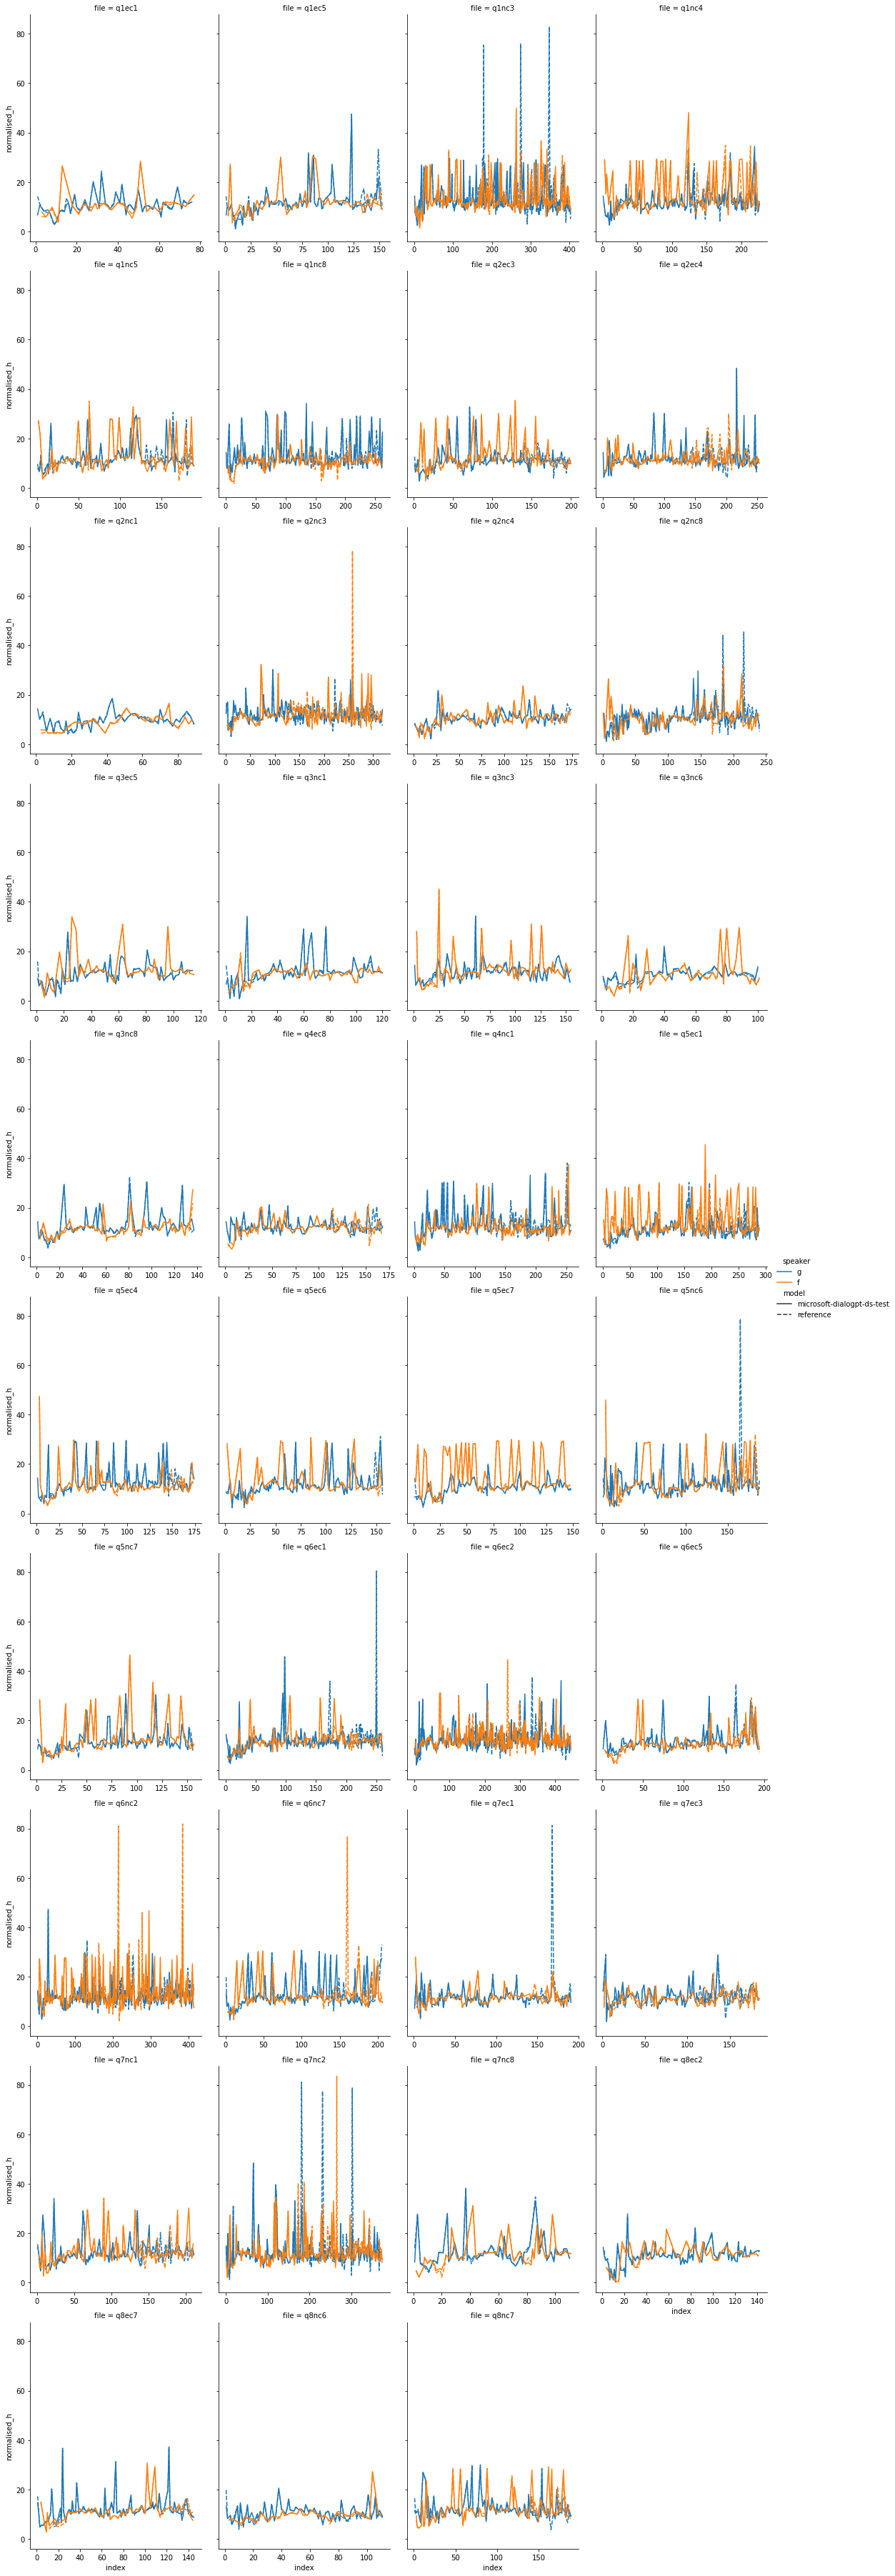

In [112]:
sns.relplot(
    data=dialogs,
    x="index", y="normalised_h",
    hue="speaker", col="file", col_wrap=4, style='model',
    kind="line", 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

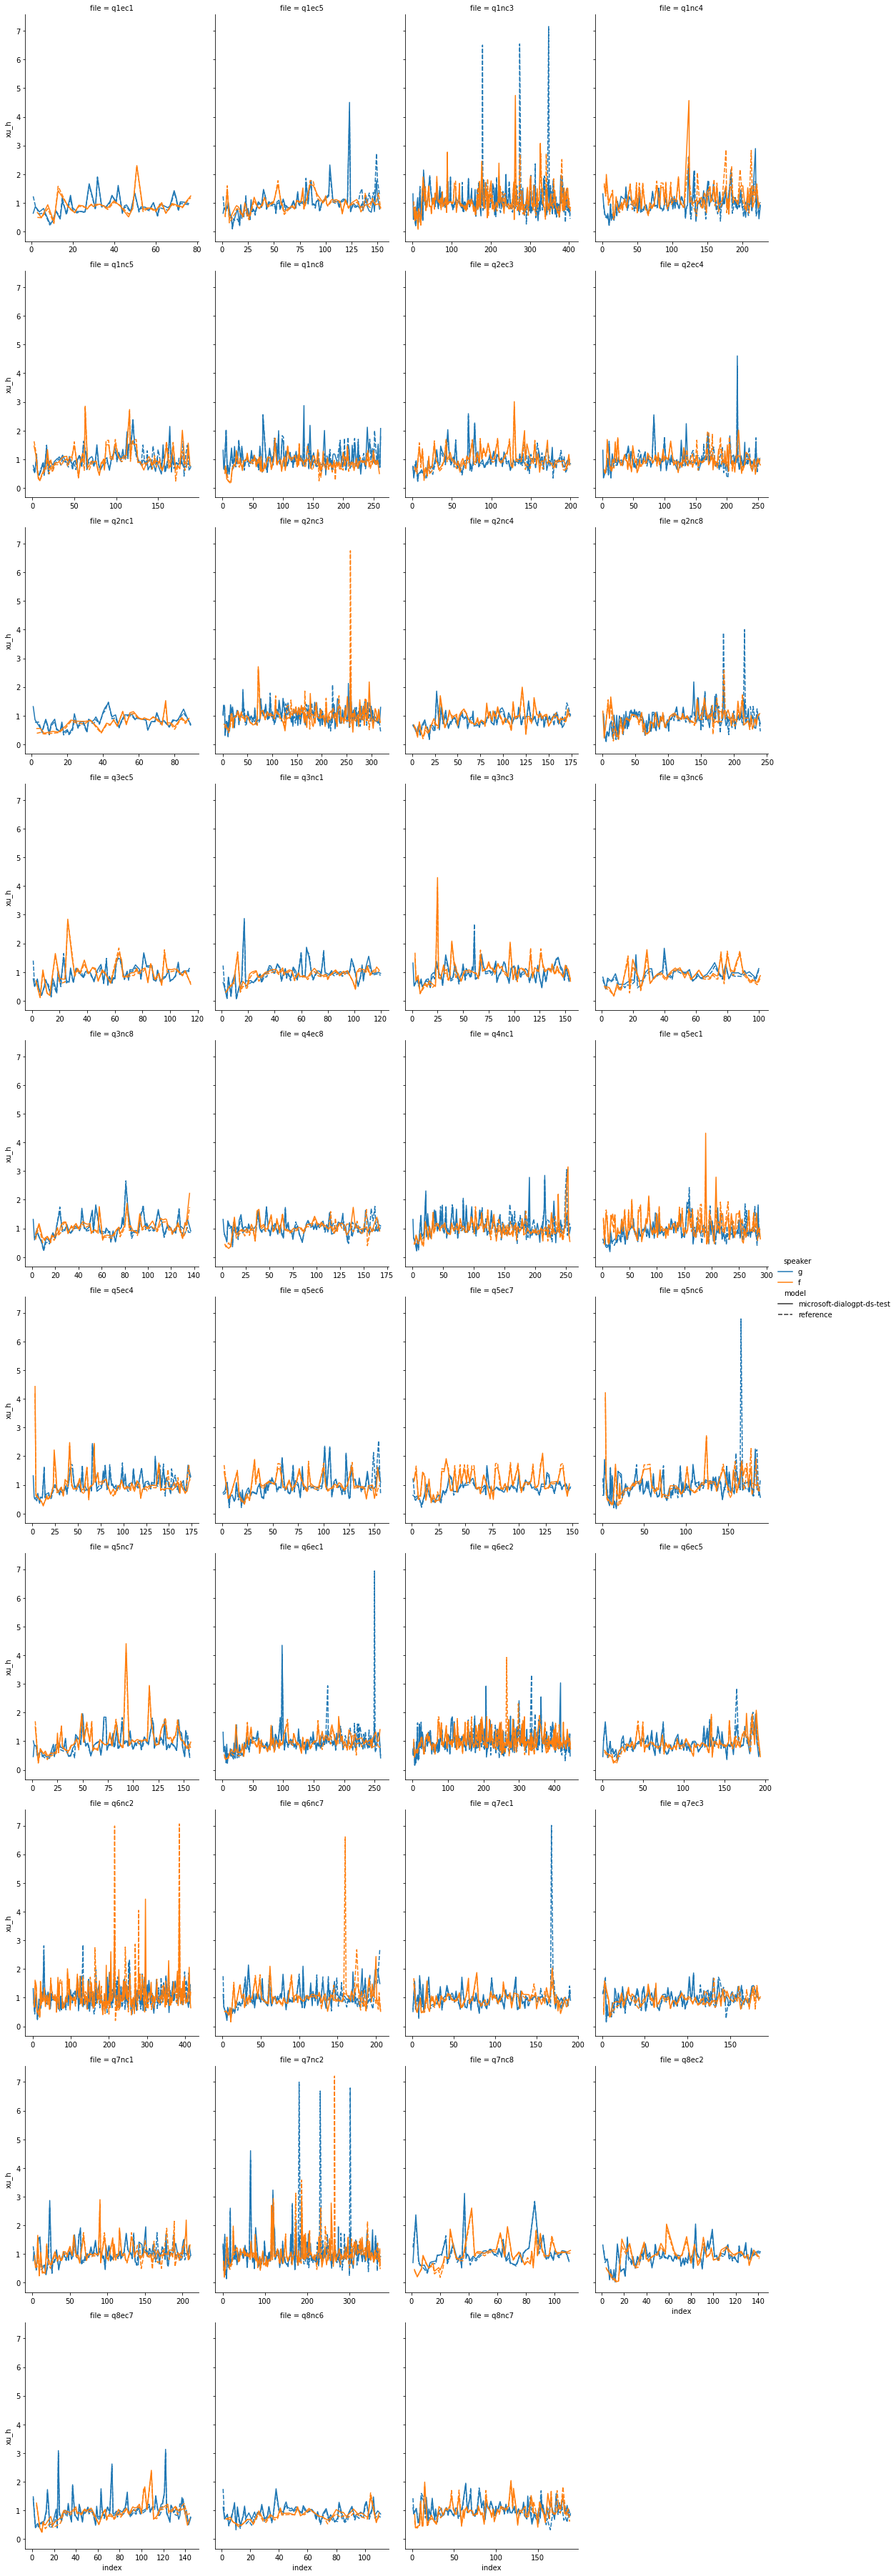

In [113]:
sns.relplot(
    data=dialogs,
    x="index", y="xu_h",
    hue="speaker", col="file", col_wrap=4, style='model',
    kind="line", 
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

### By episodes

Number of themes by file?

In [38]:
has_id_themes = 'theme_id' in dialogs.columns
theme_col = 'theme' if not has_id_themes else 'theme_id'

<AxesSubplot:ylabel='Density'>

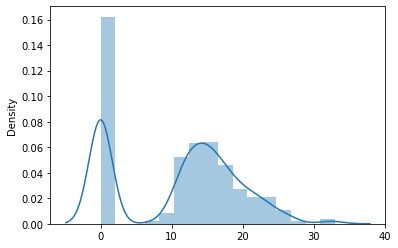

In [39]:
sns.distplot(dialogs.drop_duplicates(subset=['file',theme_col]).groupby('file').count())

In [115]:
# For the 2nd one: reindex => take the sign * max number
# Remove lines with extra transitions then for each one take the lines before / after and index and concat
# Note: issue with duplicated themes
not_transition = (dialogs[theme_col] != 'transition').astype(int)
#dialogs = dialogs[dialogs.theme != 'transition']
dialogs['theme_id'] = (dialogs[theme_col] != dialogs[theme_col].shift()).cumsum()
nb_in_ep = dialogs.groupby(['file', 'theme_id']).agg({'index': lambda x: range(len(x))}).explode('index')['index'].to_list()
inv_nb_in_ep = dialogs.groupby(['file', 'theme_id']).agg({'index': lambda x: range(-len(x),0)}).explode('index')['index'].to_list()
dialogs['count_after'] = nb_in_ep * not_transition
dialogs['count_before'] =  inv_nb_in_ep * not_transition

In [116]:
def compute_transitions_df(dialogs:pd.DataFrame, min_idx:int=10, max_idx:int=40, theme_col='theme'):
    # TODO: add checks on columns
    # remove_transitions
    dialogs = dialogs[dialogs[theme_col] != 'transition'].reset_index(drop=True)
    # get lines with 0
    new_themes = dialogs[dialogs.count_after == 0]
    if dialogs[theme_col].dtypes != int:
        new_themes['theme_id'] = range(new_themes.shape[0])

    final_df = []
    for idx, row in new_themes.iterrows():
        tmp = dialogs.iloc[max(0,idx-min_idx):min(dialogs.shape[0],idx+max_idx)]
        tmp['index'] = range(max(-min_idx,-idx), min(max_idx,dialogs.shape[0] - idx))
        # no need to check on file / model, done automatically
        tmp['ba'] = tmp.apply(lambda x: x.count_after if x['index'] >= 0 else x.count_before, axis=1)
        tmp = tmp[tmp['index'] == tmp.ba]
        if dialogs[theme_col].dtypes != int:
            tmp['theme_id'] = row.theme_id
        # Add for plotting
        tmp['count_after'] = tmp.apply(lambda x: x.count_after if x['index'] >= 0 else np.nan, axis=1)
        tmp['count_before'] = tmp.apply(lambda x: x.count_before if x['index'] <= 0 else np.nan, axis=1)
        # Add initiator / responder
        tmp['is_initiator'] = (tmp.speaker == row.speaker)
        # Add to df
        final_df.append(tmp)

    final_df = pd.concat(final_df, ignore_index=True)
    final_df['is_initiator'] = final_df.is_initiator.apply(lambda x: x * 'initiator' + (1 - x) * 'responder')
    return final_df

In [117]:
final_df = compute_transitions_df(dialogs, min_idx=5, max_idx=10, theme_col = theme_col)
final_df.shape

(16033, 40)

In [118]:
target_col = "normalised_h"

Differenciating between initiators and responders 

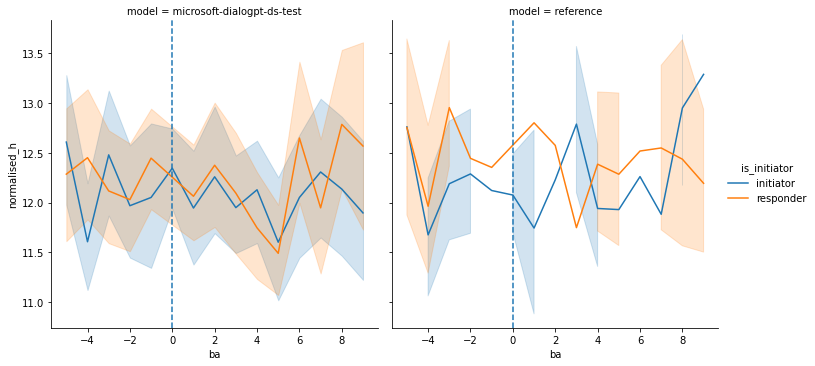

In [119]:
g = sns.relplot(data=final_df, x="ba", y=target_col, kind="line", col='model', hue='is_initiator')
for ax in g.axes_dict.values():
    ax.axvline(x=0, linestyle='dashed')

Graph we want: apply `statsmodel` _before 0_ and _after 0_ and plot it on the same graph (with a scatterplot for the values)

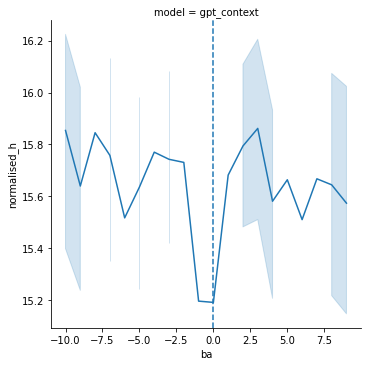

In [27]:
target_col = "normalised_h"
g = sns.relplot(data=final_df, x="ba", y=target_col, kind="line", col='model')
model_memory = {model:{} for model in final_df.model.unique()}

for model in final_df.model.unique():
    for col in ['count_before', 'count_after']:
        tmp = final_df[final_df.model == model].dropna(subset=[col])
        x = np.array([tmp['index'].min(), tmp['index'].max()])
        reg_model = sm.OLS(tmp[target_col], sm.add_constant(tmp[[col]])).fit()
        #print(model, col, reg_model.params) # .summary() for full summary of model
        g.axes_dict[model].plot(x, x*reg_model.params[col] + reg_model.params['const'], 'b')
        model_memory[model][col] = reg_model

for ax in g.axes_dict.values():
    ax.axvline(x=0, linestyle='dashed')


In [120]:
target_col = "xu_h"

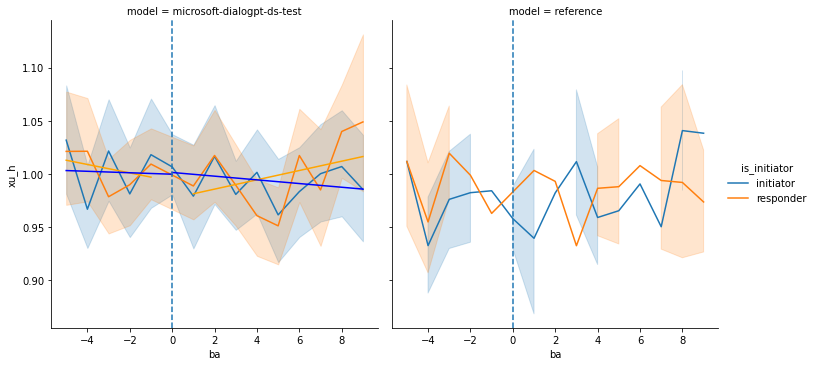

In [121]:
g = sns.relplot(data=final_df, x="ba", y=target_col, kind="line", col='model', hue='is_initiator')
model_memory = {model:{spk:{} for spk in ['initiator','responder']} for model in final_df.model.unique()}

for model in final_df.model.unique():
    for col in ['count_before', 'count_after']:
        for spk, c in zip(['responder', 'initiator'], ['orange', 'b']):
            tmp = final_df[(final_df.model == model) & (final_df.is_initiator == spk)].dropna(subset=[col])
            x = np.array([tmp['index'].min(), tmp['index'].max()])
            reg_model = sm.OLS(tmp[target_col], sm.add_constant(tmp[[col]])).fit()
            #print(model, col, reg_model.params) # .summary() for full summary of model
            g.axes_dict[model].plot(x, x*reg_model.params[col] + reg_model.params['const'], c)
            model_memory[model][spk][col] = reg_model

for ax in g.axes_dict.values():
    ax.axvline(x=0, linestyle='dashed')


Investigating a given model:
```python
for spk in ['initiator', 'responder']:
    print(f"\n-------------------{spk.upper()}------------------")
    print(model_memory['gpt_context'][spk]['count_after'].summary())
```

Data Exploration for one sentence

In [103]:
res[res.text == 'mh ouais si tu veux'][[col for col in res.columns if 'context_' not in col]]

,corpus,file,dyad,index,speaker,start,stop,text,theme,theme_role,...,has_theme,h,normalised_h,length,tokens_h,tokens,xu_h,model,text_u,sum_h
1,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,28.442576,4.063225,7,"[-11.516682624816895, -0.17777733504772186, -3...","['m', 'h', 'Ġou', 'ais', 'Ġsi', 'Ġtu', 'Ġveux']",0.864351,reference,NaN,NaN
1,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.212218,7,"[-11.058761596679688, -2.373636484146118, -3.6...",4.147299,0.646360,gpt_context_0,mh ouais si tu veux,29.485528
3817,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147302,7,"[-10.792609214782715, -0.26334744691848755, -4...",4.147299,0.822468,gpt_context_1,mh ouais si tu veux,29.031112
7633,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147304,7,"[-10.79261589050293, -0.2633468508720398, -4.2...",4.147299,0.842557,gpt_context_2,mh ouais si tu veux,29.031125
11449,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147297,7,"[-10.792576789855957, -0.263347864151001, -4.2...",4.147299,0.844409,gpt_context_3,mh ouais si tu veux,29.031081
15265,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147297,7,"[-10.792576789855957, -0.26334843039512634, -4...",4.147299,0.846863,gpt_context_4,mh ouais si tu veux,29.031081
19081,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147301,7,"[-10.792603492736816, -0.26334670186042786, -4...",4.147299,0.847680,gpt_context_5,mh ouais si tu veux,29.031104
22897,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147299,7,"[-10.79259204864502, -0.26334816217422485, -4....",4.147299,0.848037,gpt_context_6,mh ouais si tu veux,29.031096
26713,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147299,7,"[-10.79259204864502, -0.26334816217422485, -4....",4.147299,0.849066,gpt_context_7,mh ouais si tu veux,29.031096
1,cheese,Cheese-AA_OR,AAOR,1,OR,5.14,5.82492,mh ouais si tu veux,hetero selection,f,...,True,NaN,4.147297,7,"[-10.792593002319336, -0.2633475661277771, -4....",4.147297,0.851300,gpt2-fr-paco-cheese-finetuned-context_ 000—bs1,mh ouais si tu veux,29.031082


In [97]:
tmp = comparison_df[comparison_name].dropna()

In [98]:
tmp['normalised_h_diff'] = (tmp.normalised_h_ref - tmp.normalised_h_mod).abs()/tmp.normalised_h_ref

In [99]:
tmp.sort_values(by='normalised_h_diff', ascending=False).head(20)

,file,index,speaker,text,normalised_h_ref,xu_h_ref,length_ref,normalised_h_mod,xu_h_mod,length_mod,normalised_h_diff
2363,q2nc8,17,f,okay,1.334070,0.117511,2.0,8.997726,0.855204,2.0,5.744568
5868,q6nc2,217,f,i've got the sort of basic shape anyway so i s...,2.322731,0.200281,1.0,12.382504,1.002969,19.0,4.331012
2149,q2nc3,296,f,"is it an u-- an u-- a ""u""-turn or a",5.891948,0.508042,1.0,28.133431,2.175590,15.0,3.774895
6608,q7ec3,145,g,i've got lime stone cliffs which is the bottom...,3.211297,0.276899,1.0,14.192241,1.071566,25.0,3.419474
7907,q8nc7,165,g,over the summit down the right-hand side of it...,3.759123,0.324136,1.0,15.234112,1.284239,14.0,3.052571
5877,q6nc2,226,f,uh-huh right,6.571548,0.566641,1.0,24.296775,1.979734,5.0,2.697268
7225,q7nc2,366,g,go to the right about an inch and then draw an...,5.003920,0.409269,3.0,16.967571,1.374354,19.0,2.390856
802,q1nc4,169,g,the canal is about two inches to the left-hand...,4.176884,0.360158,1.0,13.837277,1.136265,22.0,2.312823
520,q1nc3,291,g,well you should curve just you you'll have to ...,3.007655,0.259339,1.0,9.717919,0.806383,13.0,2.231062
2143,q2nc3,290,f,acr-- right,9.497540,0.818939,1.0,28.709291,1.560835,4.0,2.022813


In [101]:
file = 'q2nc8'
idx = 17
ba = 4

cond = (res.file == file) & (res['index'] >= idx-ba) & (res['index'] <= idx+ba) & (res.model.isin([reference_name, comparison_name]))

res[cond][[col for col in res.columns if ('context_' not in col) or (col == 'context_<|endoftext|>100')]]

,file,speaker,theme_id,transaction_type,move_number,move_type,index,theme_index,duration,text,...,tokens,xu_h,model,text_input_ids,text_u_full,text_input_ids_full,input_ids,start_idx,attention_mask,h
2359,q2nc8,f,1,normal,6,check,13,13,0.9559,to the left-hand side,...,"['to', ' the', ' left', '-', 'hand', ' side']",1.654530,microsoft-dialogpt-ds-test,"[50256, 1462, 262, 1364, 12, 4993, 1735]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",86.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2360,q2nc8,g,1,normal,8,reply_y,14,14,0.2520,yeah,...,['yeah'],0.811830,microsoft-dialogpt-ds-test,"[50256, 43669]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",93.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2361,q2nc8,g,1,normal,9,instruct,15,15,4.9421,down until you're about an inch from the botto...,...,"['down', ' until', ' you', ""'re"", ' about', ' ...",0.413437,microsoft-dialogpt-ds-test,"[50256, 2902, 1566, 345, 821, 546, 281, 11111,...",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",95.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2362,q2nc8,g,1,normal,10,align,16,16,0.2963,okay,...,"['ok', 'ay']",0.326873,microsoft-dialogpt-ds-test,"[50256, 482, 323]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",123.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2363,q2nc8,f,1,normal,7,acknowledge,17,17,0.3740,okay,...,"['ok', 'ay']",0.855204,microsoft-dialogpt-ds-test,"[50256, 482, 323]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",126.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2364,q2nc8,g,2,normal,11,query_yn,18,1,1.9589,now take it do you have a stone circle at the ...,...,"['now', ' take', ' it', ' do', ' you', ' have'...",1.017863,microsoft-dialogpt-ds-test,"[50256, 2197, 1011, 340, 466, 345, 423, 257, 7...",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",129.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2365,q2nc8,f,2,normal,8,reply_n,19,2,0.1581,no,...,['no'],0.693021,microsoft-dialogpt-ds-test,"[50256, 3919]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",142.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2366,q2nc8,g,2,normal,12,acknowledge,20,3,0.4375,no you don't,...,"['no', ' you', ' don', ""'t""]",0.593339,microsoft-dialogpt-ds-test,"[50256, 3919, 345, 836, 470]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",144.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2367,q2nc8,g,2,normal,13,ready,21,4,0.3718,okay,...,"['ok', 'ay']",0.269884,microsoft-dialogpt-ds-test,"[50256, 482, 323]",go<|endoftext|>okay we're going to start above...,"[50256, 2188, 50256, 482, 323, 356, 821, 1016,...","[50256, 2188, 50256, 482, 323, 356, 821, 1016,...",149.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
7005,q2nc8,f,1,normal,6,check,13,13,0.9559,to the left-hand side,...,"['to', 'Ġthe', 'Ġleft', '-', 'hand', 'Ġside']",1.519986,reference,NaN,NaN,NaN,NaN,NaN,NaN,113.044363


In [82]:
res['context_<|endoftext|>000'].iloc[23219:23225].tolist()

['right<|endoftext|>right<|endoftext|>see the diamond mine up there<|endoftext|>mmhmm<|endoftext|>right well<|endoftext|>see we just go to the top left of it just sort of near the sort of square on its end right<|endoftext|>right<|endoftext|>at the diamond mine right<|endoftext|>right<|endoftext|>right<|endoftext|>just sort of up to the top left of that you start up there',
 'right<|endoftext|>right<|endoftext|>see the diamond mine up there<|endoftext|>mmhmm<|endoftext|>right well<|endoftext|>see we just go to the top left of it just sort of near the sort of square on its end right<|endoftext|>right<|endoftext|>at the diamond mine right<|endoftext|>right<|endoftext|>right<|endoftext|>just sort of up to the top left of that you start up there<|endoftext|>right',
 'right<|endoftext|>right<|endoftext|>see the diamond mine up there<|endoftext|>mmhmm<|endoftext|>right well<|endoftext|>see we just go to the top left of it just sort of near the sort of square on its end right<|endoftext|>righ

In [114]:
res[res.normalised_h >= 80]

,file,speaker,theme_id,transaction_type,move_number,move_type,index,theme_index,duration,text,...,tokens,xu_h,model,text_input_ids,text_u_full,text_input_ids_full,input_ids,start_idx,attention_mask,h
2721,q1nc3,g,22,normal,174,query_yn,348,4,0.6374,have you got anyth--,...,['--'],7.149987,reference,NaN,NaN,NaN,NaN,NaN,NaN,82.921066
16990,q6ec1,g,21,normal,150,instruct,250,2,0.7330,just like cur--,...,['--'],6.940505,reference,NaN,NaN,NaN,NaN,NaN,NaN,80.491623
18880,q6nc2,f,11,normal,106,acknowledge,215,70,0.8300,five fi--,...,['--'],6.985587,reference,NaN,NaN,NaN,NaN,NaN,NaN,81.014458
19050,q6nc2,f,24,review,191,uncodable,385,13,0.2228,y--,...,['--'],7.058128,reference,NaN,NaN,NaN,NaN,NaN,NaN,81.855743
20460,q7ec1,g,25,review,98,instruct,168,2,2.4701,then just after you hang a right well go s--,...,['--'],7.008197,reference,NaN,NaN,NaN,NaN,NaN,NaN,81.276680
22766,q7nc2,g,8,normal,98,clarify,181,11,0.7138,put put y--,...,['--'],6.995752,reference,NaN,NaN,NaN,NaN,NaN,NaN,81.132347
22850,q7nc2,f,11,normal,123,reply_w,265,8,2.6940,i've got attractive cliffs at the bottom of th--,...,['--'],7.206053,reference,NaN,NaN,NaN,NaN,NaN,NaN,83.571281


## Signal analysis

In [136]:
[x for x in os.listdir(data_folder) if 'fft' in x]

['gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_normalised_h_fft.csv',
 'gpt2-en-maptask-finetuned-maptask-ds_agg0_theme0_fft.csv',
 'gpt2-en-maptask-finetuned-maptask-ds_agg1_theme0_normalised_h_fft.csv']

In [175]:
file_pat = f"{data_folder}/gpt2-en-maptask-finetuned-maptask-ds_REPLACE.csv"
#fft = pd.read_csv(file_pat.replace('REPLACE','ds_agg0_theme0_fft'))
fft = pd.read_csv(file_pat.replace('REPLACE','agg1_theme0_normalised_h_fft'))
fft.head()

,file,speaker,freq,spec
0,q1ec1,f,0.033333,0.385528
1,q1ec1,f,0.066667,1.967388
2,q1ec1,f,0.100000,1.787142
3,q1ec1,f,0.133333,4.029522
4,q1ec1,f,0.166667,0.136205


<AxesSubplot:xlabel='freq', ylabel='spec'>

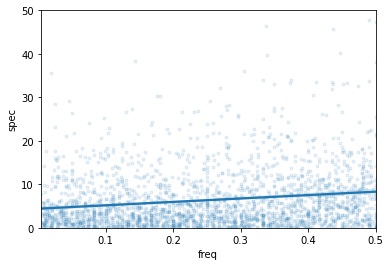

In [176]:
g = sns.regplot(data=fft[fft.speaker == 'g'], x="freq", y="spec", marker='.', scatter_kws={'alpha':0.1})
g.axes.set_ylim(0,50)
g


In [173]:
g.axes.set_ylim(0,50)

(0.0, 50.0)

comparison with random noise

In [163]:
SPEC_PATH = "/Users/neako/Documents/Cours-MasCo/PhD/tools/githubs/IT/time-series-analysis-master/Python"
sys.path.append(SPEC_PATH)
from spectrum import * # spec_pg
from functools import partial


In [168]:
tmp = res[(res.model == comparison_name)]
col = 'normalised_h'
summary = tmp[col].describe()
summary

count    7910.000000
mean        5.760961
std         2.801259
min         0.000076
25%         3.850593
50%         5.290911
75%         7.490385
max        28.439219
Name: normalised_h, dtype: float64

In [169]:
s = np.random.normal(summary['mean'], summary['std'], 1000)

In [170]:
spgram = partial(spec_pgram, taper=0, plot=False, log='no')
s_ent = spgram(s)

In [171]:
pd.DataFrame(s_ent)

,freq,spec,coh,phase,kernel,df,bandwidth,n.used,orig.n,taper,pad,detrend,demean,method
0,0.001,26.465883,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
1,0.002,0.624247,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
2,0.003,14.922931,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
3,0.004,22.566984,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
4,0.005,1.138716,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.496,3.987588,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
496,0.497,1.399036,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
497,0.498,2.167648,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram
498,0.499,10.397425,None,None,None,2.0,0.000289,1000,1000,0,0,True,False,Raw Periodogram


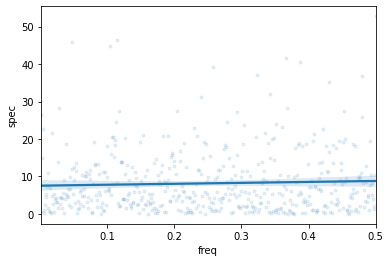

In [172]:
g = sns.regplot(data=pd.DataFrame(s_ent), x="freq", y="spec", marker='.', scatter_kws={'alpha':0.1})

In [144]:
tmp = res[(res.model == comparison_name) & (res.file == "q1ec1")]
tmp.head()

,file,speaker,theme_id,transaction_type,move_number,move_type,index,theme_index,duration,text,...,tokens,xu_h,model,text_input_ids,text_u_full,text_input_ids_full,input_ids,start_idx,attention_mask,h
0,q1ec1,g,1,normal,1,ready,1,1,0.3294,okay,...,['ay'],1.300089,gpt2-en-maptask-file-1024,NaN,NaN,NaN,NaN,NaN,NaN,10.604755
1,q1ec1,g,1,normal,2,instruct,2,2,3.1785,starting off we are above a caravan park,...,"['starting', 'Ġoff', 'Ġwe', 'Ġare', 'Ġabove', ...",1.668464,gpt2-en-maptask-file-1024,NaN,NaN,NaN,NaN,NaN,NaN,62.883449
2,q1ec1,f,1,normal,1,acknowledge,3,3,0.3459,mmhmm,...,"['mm', 'h', 'mm']",0.651521,gpt2-en-maptask-file-1024,NaN,NaN,NaN,NaN,NaN,NaN,9.787378
3,q1ec1,g,1,normal,3,instruct,4,4,9.7612,we are going to go due south straight south an...,...,"['we', 'Ġare', 'Ġgoing', 'Ġto', 'Ġgo', 'Ġdue',...",0.926140,gpt2-en-maptask-file-1024,NaN,NaN,NaN,NaN,NaN,NaN,135.787674
4,q1ec1,f,1,normal,2,check,5,5,1.5487,due south and then back up again,...,"['due', 'Ġsouth', 'Ġand', 'Ġthen', 'Ġback', 'Ġ...",1.083792,gpt2-en-maptask-file-1024,NaN,NaN,NaN,NaN,NaN,NaN,35.259274


(array([[1.44773701e-01],
        [2.83962934e-01],
        [2.67830292e-01],
        [2.42908193e-01],
        [2.11804388e-01],
        [1.77561543e-01],
        [1.43201746e-01],
        [1.11317206e-01],
        [8.37786038e-02],
        [6.16015281e-02],
        [4.49741845e-02],
        [3.34156599e-02],
        [2.60112946e-02],
        [2.16644811e-02],
        [1.93121808e-02],
        [1.80704562e-02],
        [1.72997955e-02],
        [1.66011425e-02],
        [1.57672129e-02],
        [1.47176578e-02],
        [1.34418159e-02],
        [1.19624378e-02],
        [1.03221649e-02],
        [8.58553696e-03],
        [6.84519034e-03],
        [5.22199779e-03],
        [3.85373495e-03],
        [2.87303196e-03],
        [2.38043458e-03],
        [2.42072302e-03],
        [2.96977944e-03],
        [3.93597114e-03],
        [5.17565594e-03],
        [6.51857065e-03],
        [7.79666929e-03],
        [8.86985665e-03],
        [9.64371444e-03],
        [1.00769556e-02],
        [1.0

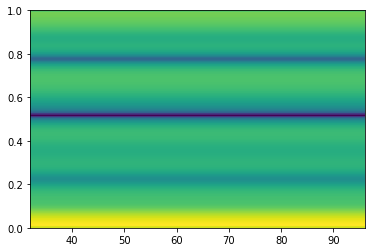

In [147]:
plt.specgram(tmp[tmp.speaker == 'f'].normalised_h, NFFT=256, Fs=2, Fc=0)